<a href="https://colab.research.google.com/github/preetikhullbe/Dogs-breed-classifier/blob/main/Dogs_breed_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import numpy as np
import shutil
import os

In [3]:
import imageio as iio

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
# prompt: print some images from the folder dir

import matplotlib.pyplot as plt
from pathlib import Path
import imageio as iio
from PIL import Image
import os


In [6]:
# import required module
from pathlib import Path

# get the path/directory
# get the path/directory
base_dir = "/content/drive/MyDrive/dataset"

# iterate over files in
# that directory
images = Path(base_dir).glob('*.png')
for image in images:
    print(image)

In [7]:
# List all files in the directory
images_list = os.listdir(base_dir)

# Filter out non-image files (optional)
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
images_list = [img for img in images_list if img.lower().endswith(valid_extensions)]

# Function to display images
def display_images(images_list, base_dir, num_images=5):
    plt.figure(figsize=(20, 10))

    for i, img_name in enumerate(images_list[:num_images]):
        img_path = os.path.join(base_dir, img_name)
        img = Image.open(img_path)

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis('off')

    plt.show()


In [8]:
# Display the first 5 images
display_images(images_list, base_dir, num_images=10)

<Figure size 2000x1000 with 0 Axes>

In [9]:
import os

# Define the directory paths
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Create the directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# If you have multiple classes, create subdirectories for each class
classes = ['Yorkshire_Terrier', 'Rottweiler','Poodle','Labrador_Retriever','Golden_Retriever',
     'German_Shepherd','Dachshund','BullDog','Boxer','Beagle']
     # Add your classes here
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, class_name), exist_ok=True)

print("Directories created successfully!")


Directories created successfully!


In [11]:
import shutil
from sklearn.model_selection import train_test_split
import glob

# Get the list of all images
# Check the glob pattern and base_dir to ensure they are correct
all_images = glob.glob(os.path.join(base_dir, '**/*.[jp][pn]g'), recursive=True)

# Split the data into training and validation sets
train_images, validation_images = train_test_split(all_images, test_size=0.2, random_state=42)

# Function to copy images to the target directory
def copy_images(image_list, target_dir):
    for image_path in image_list:
        class_name = os.path.basename(image_path).split('_')[0]  # Assuming class name is part of the file name
        target_class_dir = os.path.join(target_dir, class_name)
        # Check if the file already exists in the target directory
        if not os.path.exists(os.path.join(target_class_dir, os.path.basename(image_path))):
            shutil.copy(image_path, target_class_dir)  # Copy only if it doesn't exist

# Copy training images
copy_images(train_images, train_dir)

# Copy validation images
copy_images(validation_images, validation_dir)

print("Data split and copied successfully!")

Data split and copied successfully!


In [12]:
# Step 3: Data Augmentation and Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

Found 476 images belonging to 10 classes.
Found 222 images belonging to 10 classes.


In [18]:
# Step 4: Building the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  # Use 'softmax' for multi-class classification
])


In [19]:
model.compile(
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [21]:
# Step 5: Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/50
14/14 [==============================] - 67s 5s/step - loss: 1.8159 - accuracy: 0.2005 - val_loss: 1.5845 - val_accuracy: 0.3177
Epoch 2/50
14/14 [==============================] - 31s 2s/step - loss: 1.6806 - accuracy: 0.2320 - val_loss: 1.5598 - val_accuracy: 0.2917
Epoch 3/50
14/14 [==============================] - 34s 2s/step - loss: 1.6317 - accuracy: 0.2770 - val_loss: 1.5279 - val_accuracy: 0.4010
Epoch 4/50
14/14 [==============================] - 33s 2s/step - loss: 1.6105 - accuracy: 0.3198 - val_loss: 1.5310 - val_accuracy: 0.2969
Epoch 5/50
14/14 [==============================] - 34s 2s/step - loss: 1.5645 - accuracy: 0.3063 - val_loss: 1.4241 - val_accuracy: 0.4271
Epoch 6/50
14/14 [==============================] - 34s 2s/step - loss: 1.5196 - accuracy: 0.3401 - val_loss: 1.4103 - val_accuracy: 0.3750
Epoch 7/50
14/14 [==============================] - 33s 2s/step - loss: 1.5249 - accuracy: 0.3559 - val_loss: 1.3648 - val_accuracy: 0.4740
Epoch 8/50
14/14 [==

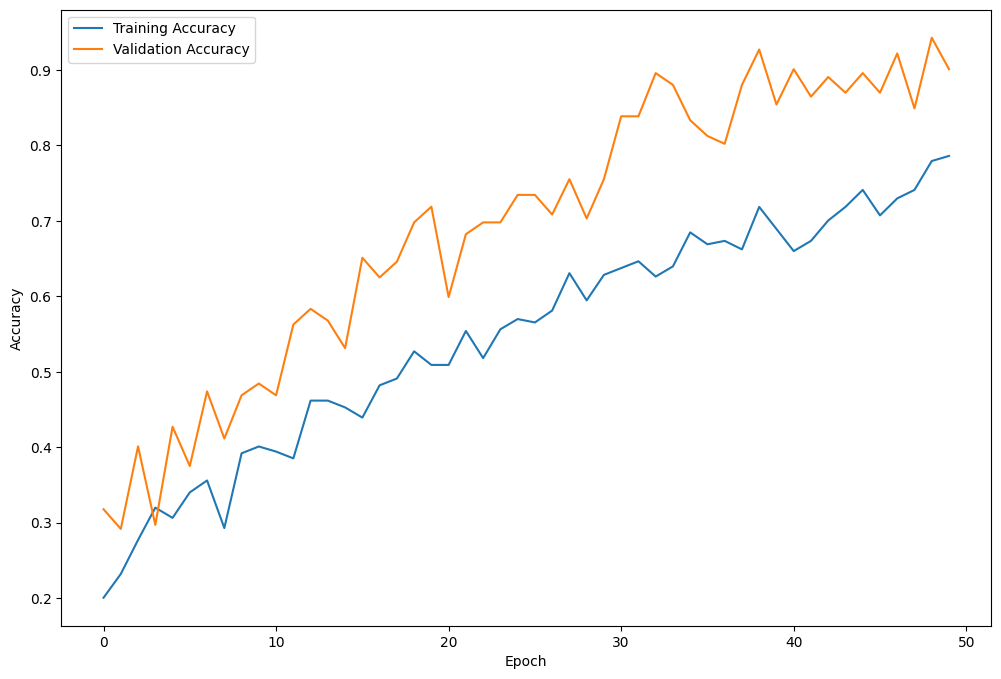

In [23]:
# Plot the training and test accuracy
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()